# Project: Investigating TMDb Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

#### Question 1: Which genres are most popular from year to year? (Will refer to this as "Q1") 

#### Question 2: What kinds of properties are associated with movies that have high revenues? (Will refer to this as "Q2")

<a id='wrangling'></a>
## Data Wrangling


### General Properties
Please see "Accessing" Notebook for wrangling

In [2]:
# Load your data and print out a few lines. 
df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning

#### From inspecting this data, determining which columns will be needed for analysis for questions:

> **Removing unnessary columns, duplicated rows, and rows with NAN values:** <br>
- imdb_id, homepage, tagline, keywords, overview ,runtime, vote_count, release_date <br>
- duplicated rows
- Rows with null values


**Removing unnessary columns and duplicated rows:** <br>
imdb_id, homepage, tagline, keywords, overview ,runtime, vote_count, release_date <br>
duplicated rows 

In [3]:
#Dropping columns
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview' ,'runtime', 'vote_count', 'release_date'], axis=1, inplace=True)

In [4]:
#Printing duplicates
df.duplicated().sum()

1

In [5]:
#Dropping duplicated rows
df.drop_duplicates(inplace=True)

In [6]:
#Printing duplicates
df.duplicated().sum()

0

**Dropping Rows with NAN values:** <br>

In [7]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# Because the NA values make up around 10% of our dataframe, will replace them rather than dropping
df.fillna('NA',inplace=True)

In [9]:
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
genres                  0
production_companies    0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Saving edited file

In [10]:
df.to_csv('tmdb-movies_edited.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: most popular genre by year:

#### Exploration
>**Q1 for Popular genre by year:** <br>
id, popularity, genres, release_year



>**Q2 for variables influencing revenue:** <br>
id, popularity, original_title, cast, director, genres, production_companies, vote_average, budget_adj, revenue_adj

In [11]:
#sorting years for interation
years = np.sort(df.release_year.unique(), axis=None)
years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

In [12]:
#stuck on this part, as far as I got
df.groupby(['release_year', 'genres'])['popularity'].max().nlargest(10)

release_year  genres                                   
2015          Action|Adventure|Science Fiction|Thriller    32.985763
2014          Adventure|Drama|Science Fiction              24.949134
              Action|Science Fiction|Adventure             14.311205
2015          Adventure|Science Fiction|Thriller           13.112507
2014          Action|Adventure|Science Fiction             12.971027
1977          Adventure|Action|Science Fiction             12.037933
2014          Action|Thriller                              11.422751
2015          Action|Adventure|Science Fiction|Fantasy     11.173104
2014          Science Fiction|Adventure|Thriller           10.739009
              Adventure|Fantasy                            10.174599
Name: popularity, dtype: float64

### Research Question 2  variables influencing revenue:

**Q2 for variables influencing revenue:** <br>
id, popularity, original_title, cast, director, genres, production_companies, vote_average, budget_adj, revenue_adj

Create a histogram to look at quantitative data thats available.

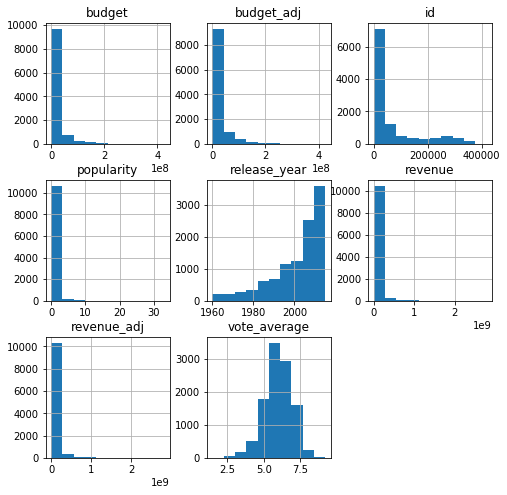

In [13]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.hist(figsize=(8,8));

For comparison to qualitative columns, will see if director or production company effects adjusted revenue

In [14]:
df['director'].value_counts().head(6)

Woody Allen         45
NA                  44
Clint Eastwood      34
Martin Scorsese     29
Steven Spielberg    29
Ridley Scott        23
Name: director, dtype: int64

Note: From fillna, will ignore NA.

In [15]:
df_woody = df.query(("director == '{}'").format('Woody Allen')) 
df_clint = df.query(("director == '{}'").format('Clint Eastwood')) 
df_steven = df.query(("director == '{}'").format('Steven Spielberg')) 
df_martin = df.query(("director == '{}'").format('Martin Scorsese')) 
df_ridley = df.query(("director == '{}'").format('Ridley Scott')) 

mean_woody = df_woody['revenue_adj'].mean()
mean_clint = df_clint['revenue_adj'].mean()
mean_steven = df_steven['revenue_adj'].mean()
mean_martin = df_martin['revenue_adj'].mean()
mean_ridley = df_ridley['revenue_adj'].mean()


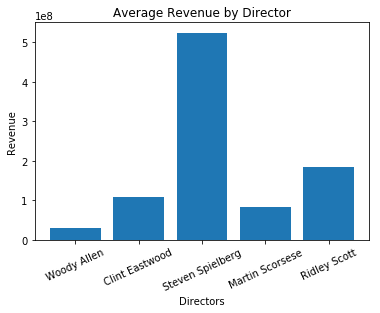

In [16]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4, 5]
heights = [mean_woody, mean_clint, mean_steven, mean_martin, mean_ridley]
labels = ['Woody Allen', 'Clint Eastwood', 'Steven Spielberg','Martin Scorsese','Ridley Scott']

plt.bar(locations, heights, tick_label=labels) #locations initiates the x axis ticks, heights is the data, tick_labels rename the x axis ticks as names
plt.title('Average Revenue by Director')
plt.xlabel('Directors')
plt.xticks(locations, labels, rotation=25)
plt.ylabel('Revenue');

In [17]:
df['production_companies'].value_counts().head(5)

NA                      1030
Paramount Pictures       156
Universal Pictures       133
Warner Bros.              84
Walt Disney Pictures      76
Name: production_companies, dtype: int64

In [18]:
df_para = df.query(("production_companies == '{}'").format('Paramount Pictures')) 
df_uni = df.query(("production_companies == '{}'").format('Universal Pictures')) 
df_warner = df.query(("production_companies == '{}'").format('Warner Bros.')) 
df_walt = df.query(("production_companies == '{}'").format('Walt Disney Pictures')) 
df_mgm = df.query(("production_companies == '{}'").format('Metro-Goldwyn-Mayer (MGM)')) 

mean_para = df_para['revenue_adj'].mean()
mean_uni = df_uni['revenue_adj'].mean()
mean_warner = df_warner['revenue_adj'].mean()
mean_walt = df_walt['revenue_adj'].mean()
mean_mgm = df_mgm['revenue_adj'].mean()

mean_uni

58090725.64020198

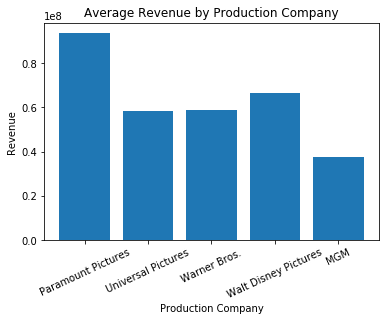

In [19]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4, 5]
heights = [mean_para, mean_uni, mean_warner, mean_walt, mean_mgm]
labels = ['Paramount Pictures', 'Universal Pictures', 'Warner Bros.','Walt Disney Pictures','MGM']

plt.bar(locations, heights, tick_label=labels) #locations initiates the x axis ticks, heights is the data, tick_labels rename the x axis ticks as names
plt.title('Average Revenue by Production Company')
plt.xlabel('Production Company')
plt.xticks(locations, labels, rotation=25)
plt.ylabel('Revenue');

From my observation, I will compare budget_adj, popularity, and vote_average to revenue_adj.
I will also compare with the 5 most frequently used directors and production companies.

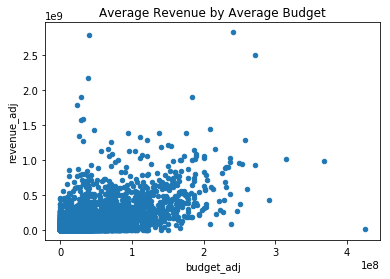

In [20]:
df.plot(x='budget_adj', y='revenue_adj', kind='scatter', title='Average Revenue by Average Budget');

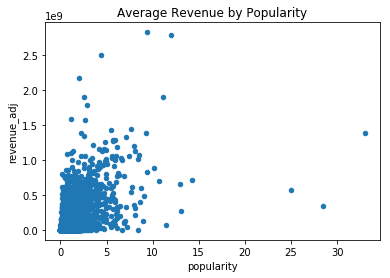

In [21]:
df.plot(x='popularity', y='revenue_adj', kind='scatter', title='Average Revenue by Popularity');

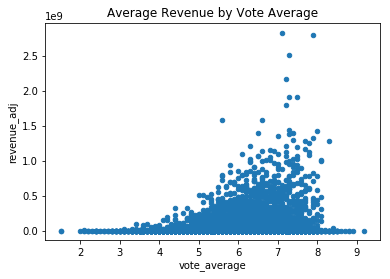

In [22]:
df.plot(x='vote_average', y='revenue_adj', kind='scatter',  title='Average Revenue by Vote Average');

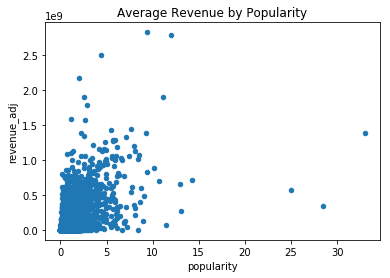

In [23]:
df.plot(x='popularity', y='revenue_adj', kind='scatter',  title='Average Revenue by Popularity');

<a id='conclusions'></a>
## Conclusions

#### Limitations
__In General__
- As of where this document stands, no statistical tests were made. No tests for correlation were made.
- Missing values were marked as 'NA', which accounts for missing actors, directors, genres, and production companies.

__Q1: Popular Genre by year__
- Individual genres were not split. Impossible to factor how much a particular genre would affect the popularity of a movie. 

__Q2: factors affecting revenue__
- Actors wasn't used as a factor for influence revenue, would need to know their earnings to factor this into the equation


#### Sites used:<br>
https://stackoverflow.com/questions/15705630/python-getting-the-row-which-has-the-max-value-in-groups-using-groupby/ 

https://stackoverflow.com/questions/17116814/pandas-how-do-i-split-text-in-a-column-into-multiple-rows#17116976

https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html

https://matplotlib.org/gallery/ticks_and_spines/ticklabels_rotation.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

In [24]:
df.to_csv('tmdb-movies_clean.csv', index=False)